# <font color='blue'>Titanic</font>

`RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time.[a] It remains the deadliest peacetime sinking of an ocean liner or cruise ship.[4] The disaster drew public attention, spurred major changes in maritime safety regulations, and inspired many artistic works.`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.simplefilter("ignore")


In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

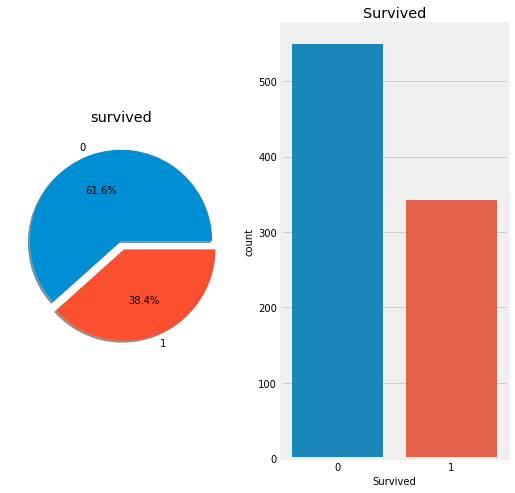

In [4]:
f, ax = plt.subplots(1,2,figsize=(8,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%",ax=ax[0], shadow = True)
ax[0].set_title("survived")
ax[0].set_ylabel("")
sns.countplot("Survived",data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# <font color='blue'>Sex</font>

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


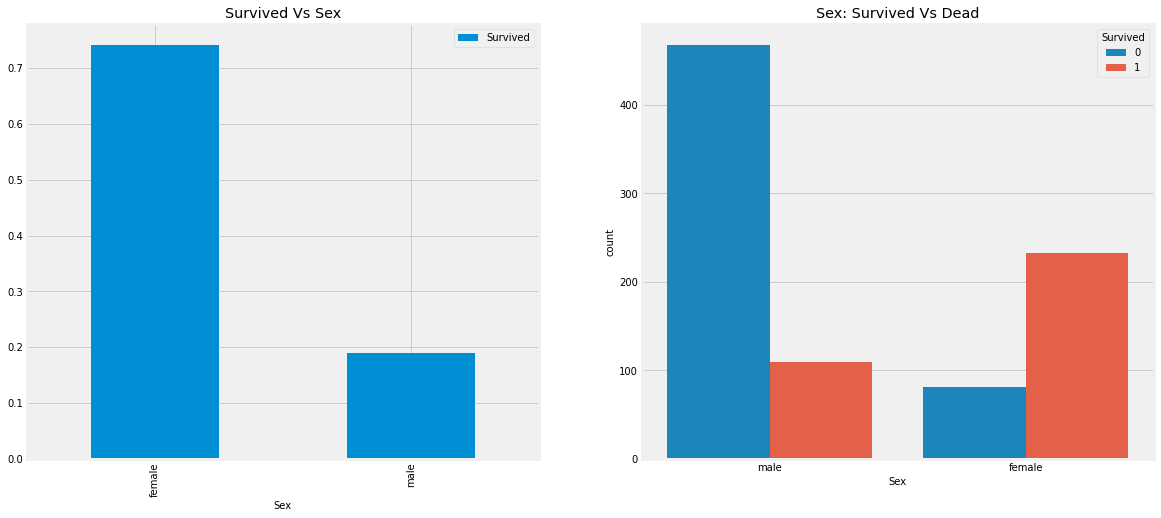

In [8]:
f,ax= plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived Vs Sex")

sns.countplot(x= "Sex",hue='Survived',data=data,ax=ax[1])
ax[1].set_title("Sex: Survived Vs Dead")

plt.show()

# <font color='blue'>**P_Class**</font>

In [9]:
pd.crosstab(data['Pclass'],data['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


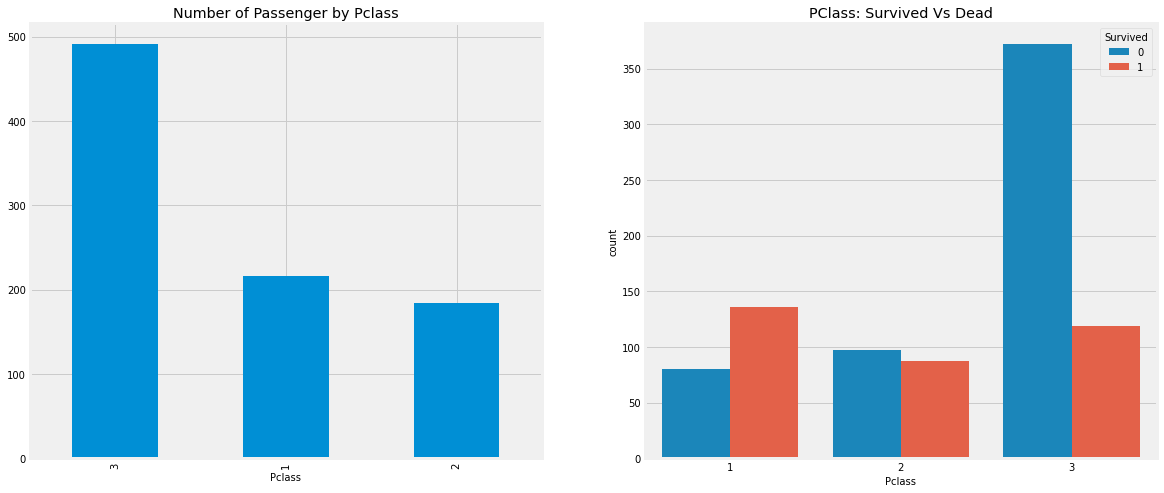

In [10]:
f,ax= plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passenger by Pclass")
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title("PClass: Survived Vs Dead")
plt.show();

In [11]:
pd.crosstab([data['Sex'],data['Survived']], data['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

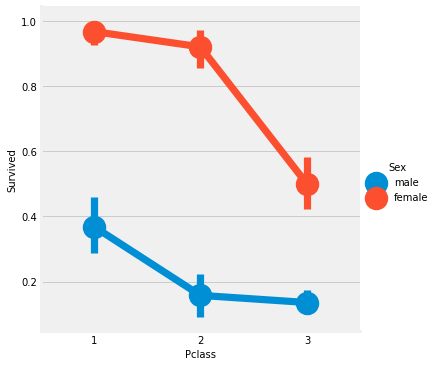

In [12]:
sns.factorplot("Pclass",'Survived',hue='Sex',data=data)
plt.show();

# <font color='blue'>**Age**</font>

In [13]:
data["Age"].min(),data["Age"].max(),data["Age"].mean()

(0.42, 80.0, 29.69911764705882)

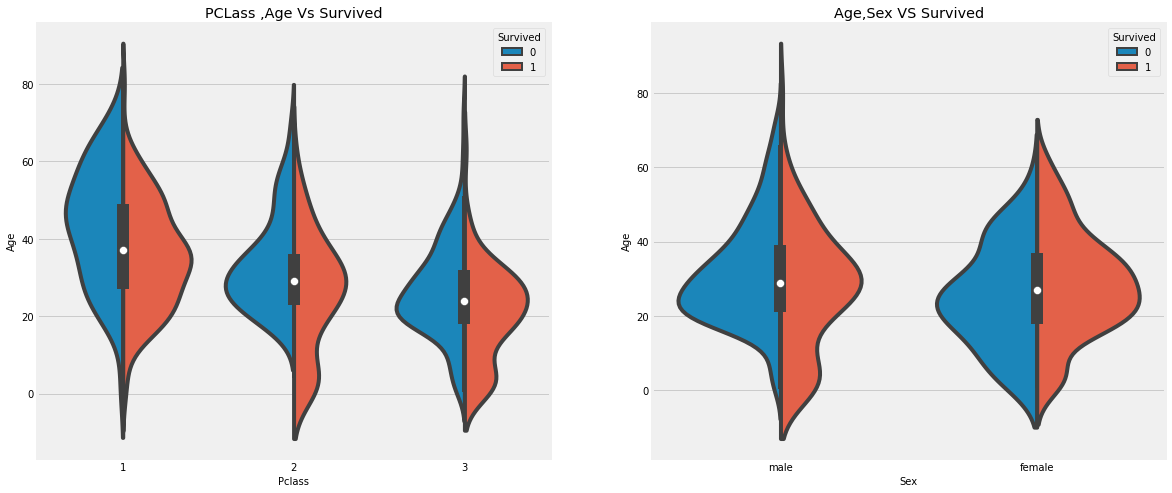

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title("PCLass ,Age Vs Survived")
sns.violinplot("Sex",'Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title("Age,Sex VS Survived")
plt.show();

In [15]:
data['initials']=0
data['initials'] = data['Name'].str.split(',').str.get(1).str.split('.').str.get(0)

In [16]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(data['Initial'],data['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initials,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [18]:
pd.crosstab(data['initials'],data['Sex'])

Sex,female,male
initials,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [19]:
data['initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# <font color='blue'>**Fill na ages**</font>

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
initials         0
Initial          0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  initials     891 non-null    object 
 13  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [23]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [24]:
data['Age'].isnull().sum()

0

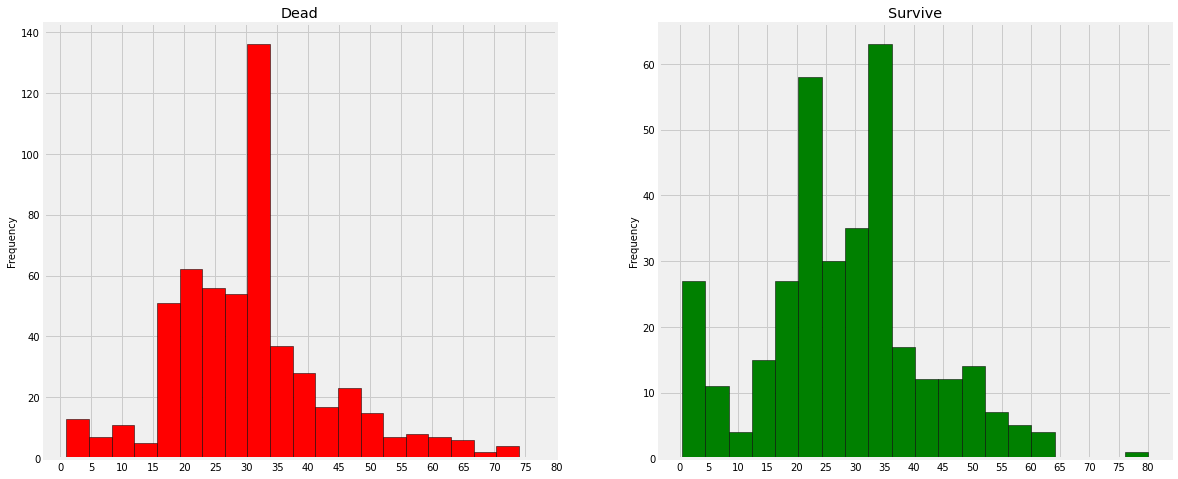

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title("Dead")
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,color='green',edgecolor='black')
ax[1].set_title("Survive")
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show();

<Figure size 1296x864 with 0 Axes>

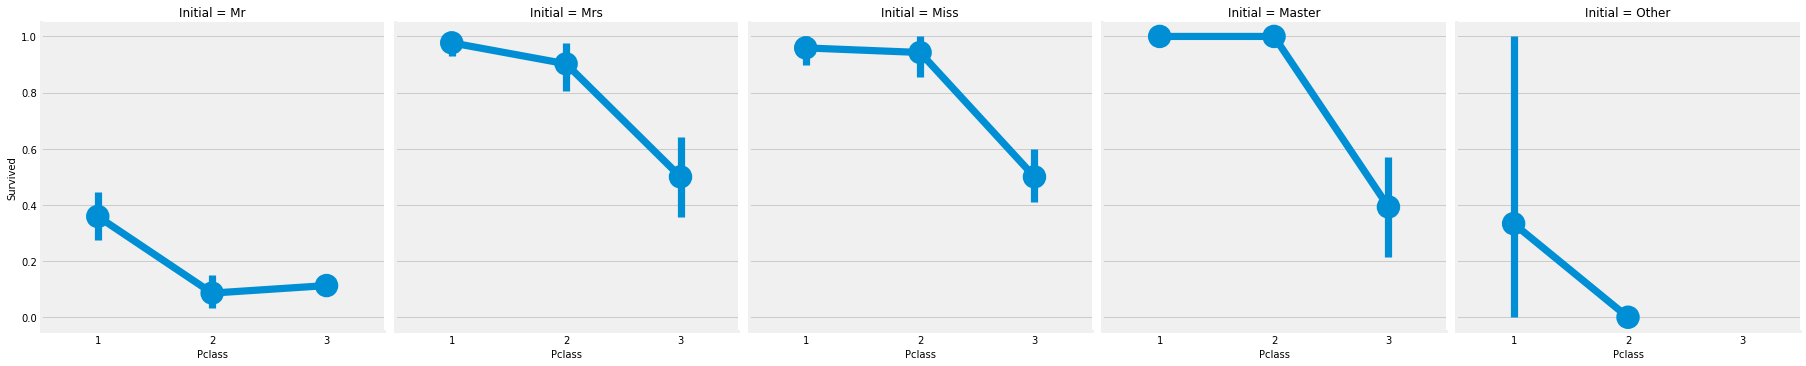

In [26]:
plt.figure(figsize=(18,12))
sns.factorplot("Pclass","Survived",col="Initial",data=data)
plt.show();

# <font color='blue'>**Embarked - Nominal data**</font>

In [27]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

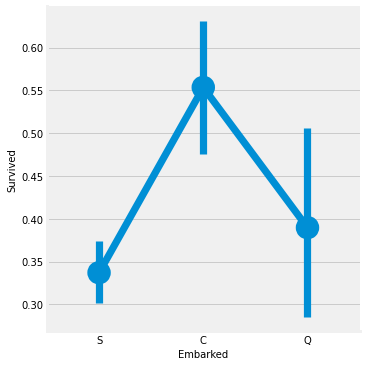

In [28]:
sns.factorplot("Embarked","Survived",data=data)
plt.show()

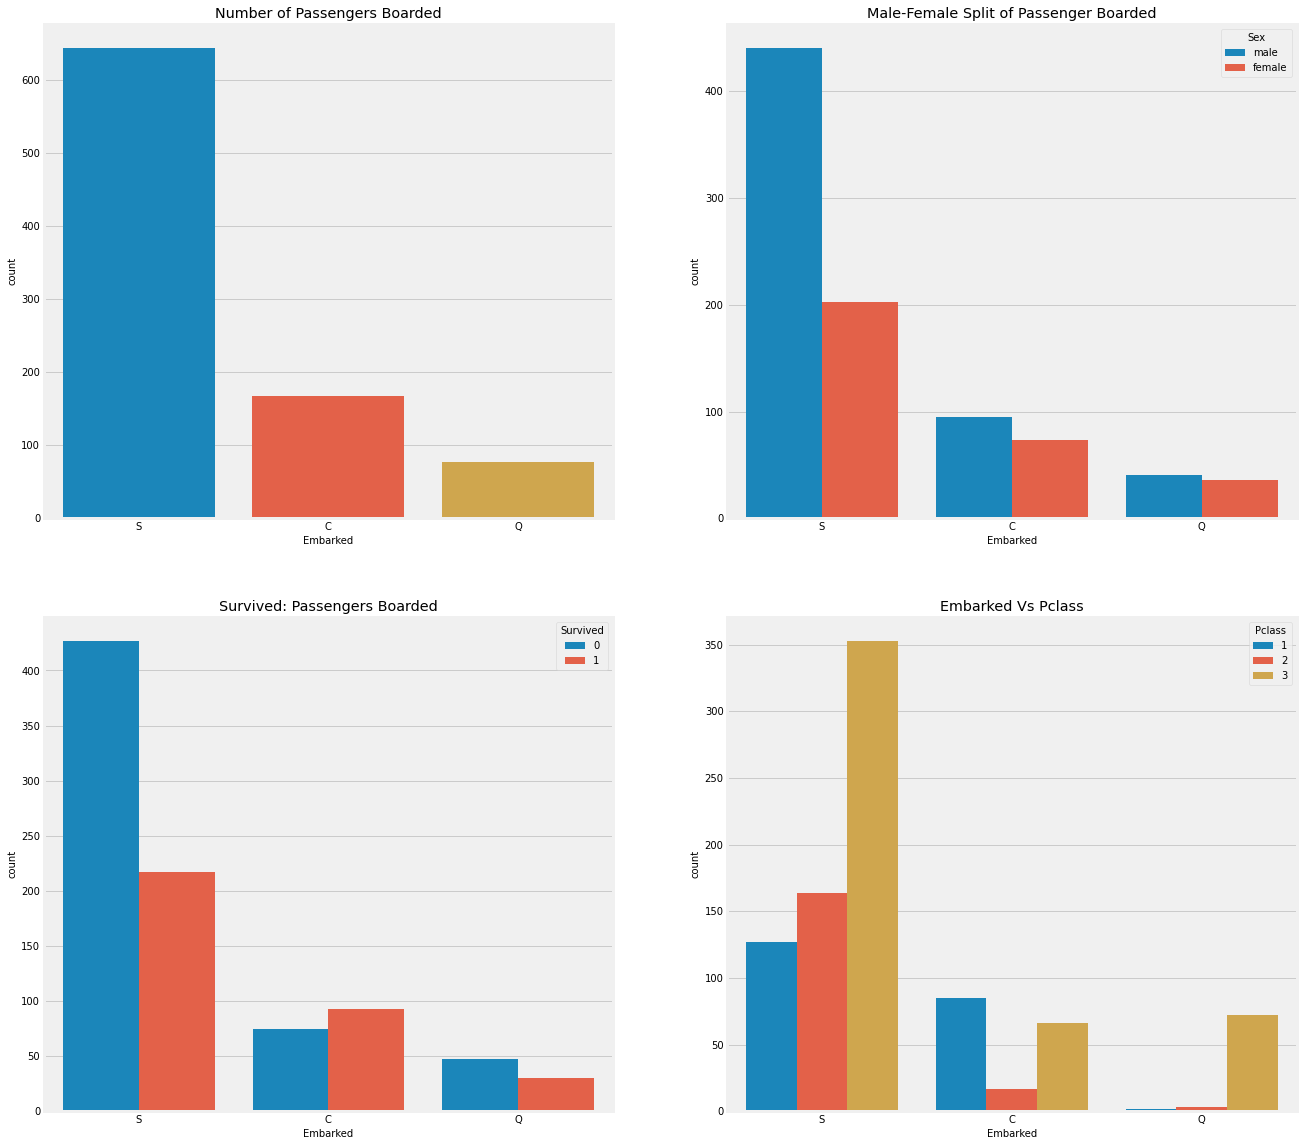

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot("Embarked",data=data,ax=ax[0,0])
ax[0,0].set_title("Number of Passengers Boarded")

sns.countplot("Embarked",hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title("Male-Female Split of Passenger Boarded")

sns.countplot("Embarked",hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title("Survived: Passengers Boarded")

sns.countplot("Embarked",hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

plt.show();

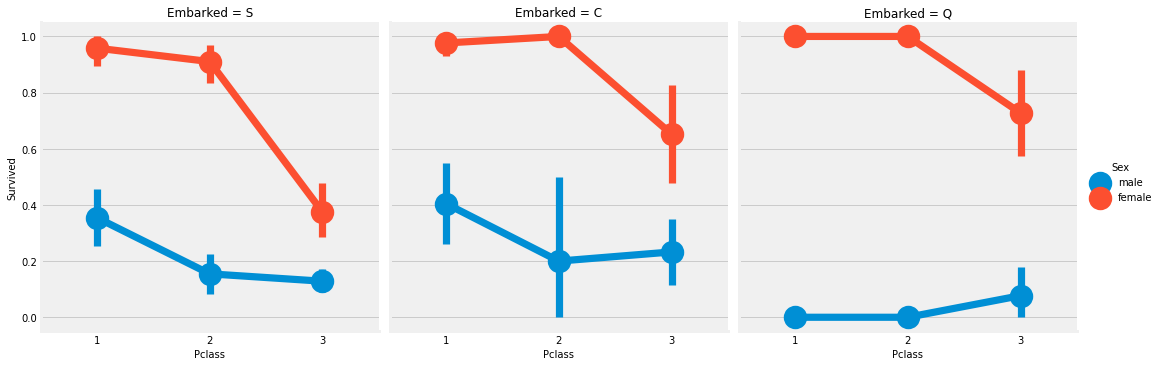

In [30]:
sns.factorplot("Pclass",'Survived',hue='Sex',col='Embarked',data=data)
plt.show();

In [31]:
data['Embarked'].isna().sum()

2

In [32]:
data['Embarked'].fillna('S',inplace=True)

In [33]:
data['Embarked'].isna().sum()

0

In [34]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
initials         0
Initial          0
dtype: int64

# <font color='blue'>**Siblings**</font>

In [35]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [36]:
pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


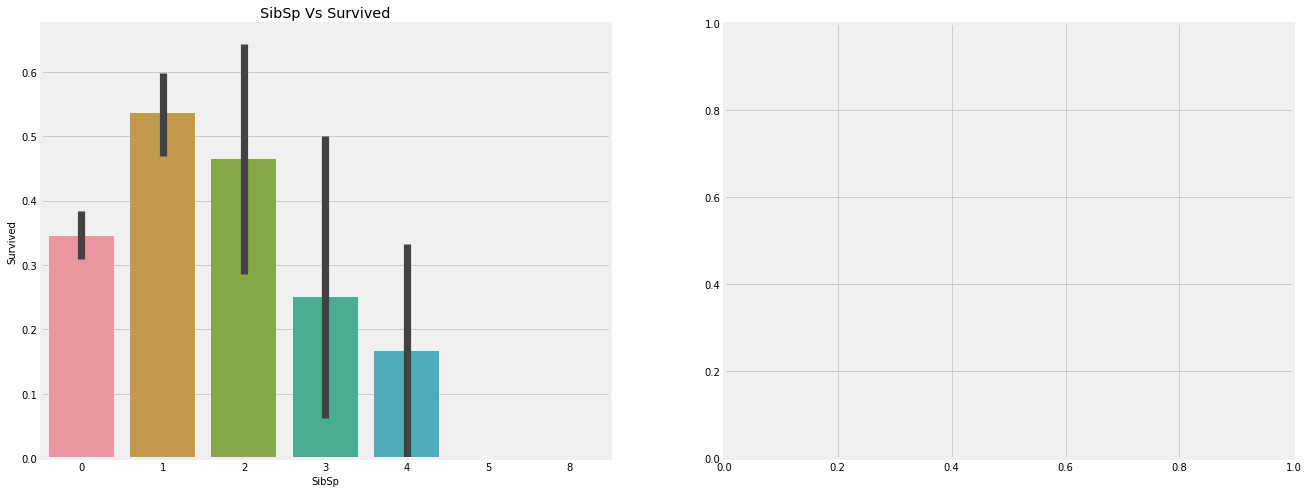

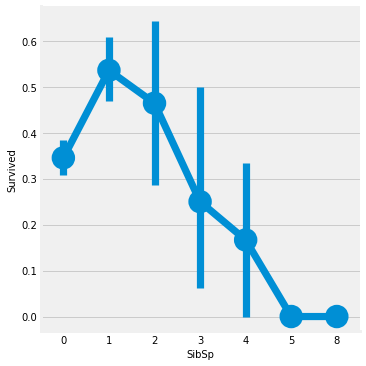

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp Vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
plt.close(3)
plt.show()

# <font color='blue'>**Fare - Continuous value**</font>

In [38]:
data['Fare'].max(), data['Fare'].min(), data['Fare'].mean()

(512.3292, 0.0, 32.204207968574636)

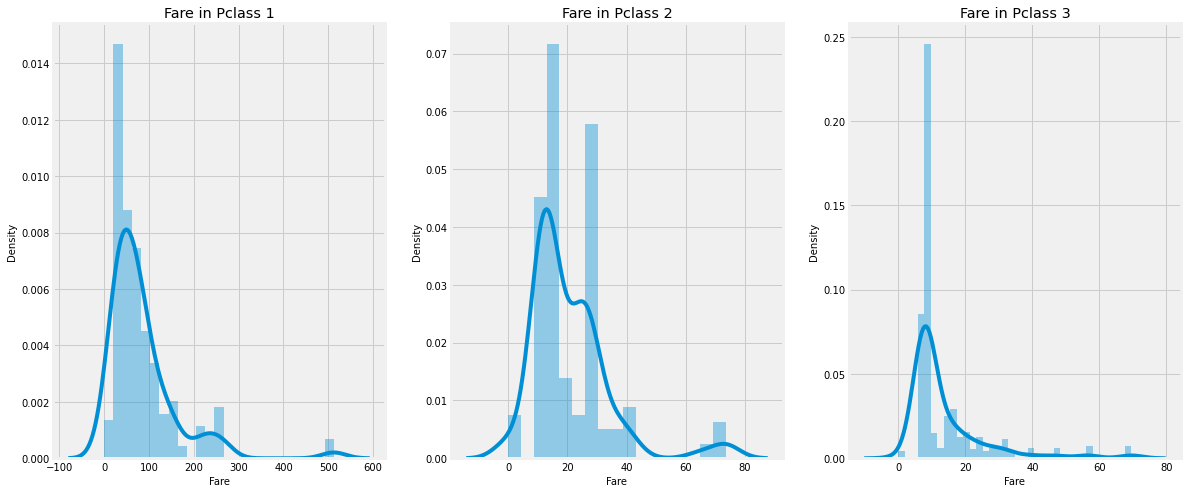

In [41]:
f,ax=plt.subplots(1,3,figsize=(18,8))
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0])
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[1])
sns.distplot(data[data['Pclass']==3]['Fare'],ax=ax[2])
ax[0].set_title("Fare in Pclass 1")
ax[1].set_title("Fare in Pclass 2")
ax[2].set_title("Fare in Pclass 3")
plt.show();

* **Sex** : <font color='red'>Women has more survival chance than men</font>
* **Pclass** : <font color='red'>Class 1 > class 2 > class 3</font>
* **Age** : <font color='red'>children with age 5 to 10 , 15 to 35 - died</font>
* **Embarked** : <font color='red'>C port has higher survival rate</font>

# <font color='blue'>Correlation</font>

In [45]:
df = data.select_dtypes(include='int')

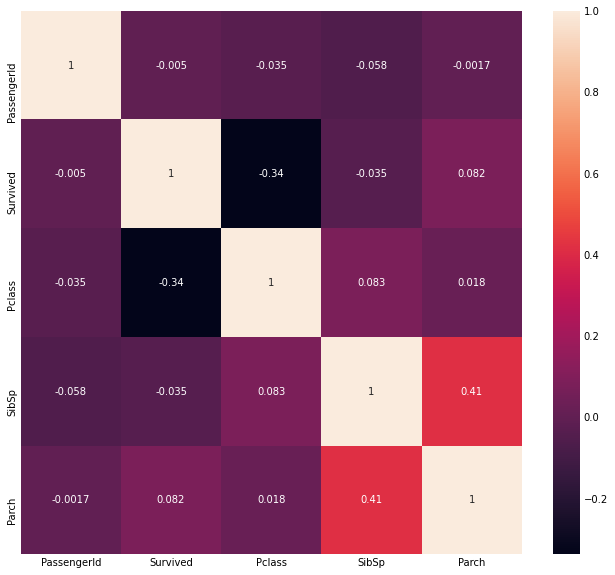

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initials,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [50]:
data['Age_cat']=0
data.loc[data['Age']<=16,'Age_cat']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_cat']=1
data.loc[(data['Age']>32)&(data['Age']<=50),'Age_cat']=2
data.loc[(data['Age']>50)&(data['Age']<=70),'Age_cat']=3
data.loc[(data['Age']>70),'Age_cat']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initials,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,2


In [51]:
data['Age_cat'].value_counts()

Age_cat
1    382
2    341
0    104
3     59
4      5
Name: count, dtype: int64

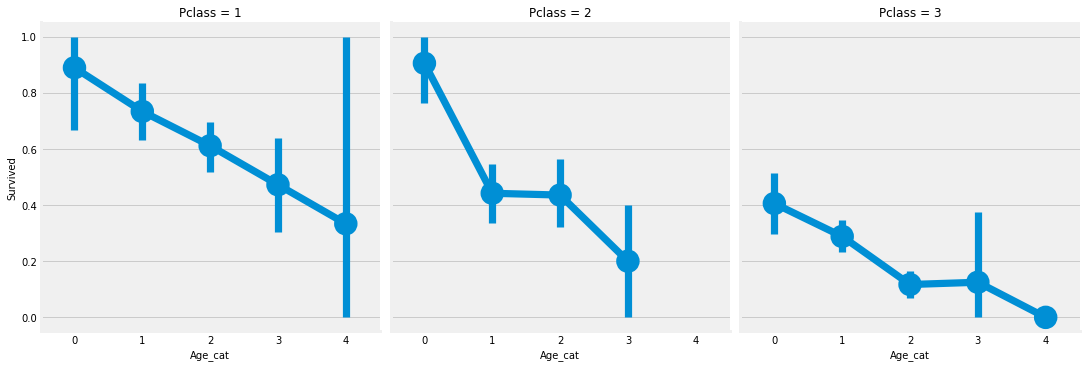

In [53]:
sns.factorplot('Age_cat','Survived',data=data,col='Pclass');